## Title
### Vaccination Rate and impact on Economy due to the Pandemic

## About the data sets

###Dataset 1
### COVID-19 World Vaccination Progress
- Data collected from https://ourworldindata.org/

### Column Info
**The data (country vaccinations) contains the following information:**

- Country- this is the country for which the vaccination information is provided;
- Country ISO Code - ISO code for the country;
- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
- Total number of vaccinations - this is the absolute number of total immunizations in the country;
- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there - - might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;

### Inspiration
**Track COVID-19 vaccination in the World, answer instantly to your questions:**

- Which country is using what vaccine?
- In which country the vaccination programme is more advanced?

### Dataset 02
##Impact of Covid-19 Pandemic on the Global Economy 
- Data for 170 countries with respect to the impact of covid-19 on the global economy

### Column Info
##### HDI (normalised value between 0-1)
- The Human Development Index (HDI) is a statistic composite index of - life expectancy, education (literacy rate, gross enrollment ratio at different levels and net attendance ratio), and per capita income indicators, which are used to rank countries into four tiers of human development.
##### TC 
- Total cost
##### TD 
- Trade Diversion
##### STI
- Science, technology and innovation index (STI)
##### POP
- The public offering price (POP) is the price at which new issues of stock are offered to the public by an underwriter
##### GDPCAP
- The gross domestic product per capita, or GDP per capita, is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population.

### Inspiration
**Trying to explore the relationship between covid vaccine data and world economy data :**
- Does GDP have an impact on vaccination rate?
- Finding correlation between world economy and Covid  vaccine data parameters.

##LANDING ZONE
- Loading the respective datasets and defining the schema
- Cleaning the data
- Statistical analysis of the data

##![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) Data Preparation

In [0]:
%fs ls /FileStore/tables/covid

path,name,size
dbfs:/FileStore/tables/covid/country_vaccinations-1.csv,country_vaccinations-1.csv,1780956
dbfs:/FileStore/tables/covid/country_vaccinations.csv,country_vaccinations.csv,1677845
dbfs:/FileStore/tables/covid/transformed_data.csv,transformed_data.csv,4221784


In [0]:
vaccines_df_raw = (spark.read .option("header",True)
                .csv('dbfs:/FileStore/tables/covid/country_vaccinations-1.csv').display())

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
Afghanistan,AFG,2021-02-22,0.0,0.0,null,null,null,0.0,0.0,null,null,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-23,null,null,null,null,1367.0,null,null,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-24,null,null,null,null,1367.0,null,null,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-25,null,null,null,null,1367.0,null,null,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-26,null,null,null,null,1367.0,null,null,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-27,null,null,null,null,1367.0,null,null,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-28,8200.0,8200.0,null,null,1367.0,0.02,0.02,null,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-01,null,null,null,null,1580.0,null,null,null,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-02,null,null,null,null,1794.0,null,null,null,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-03,null,null,null,null,2008.0,null,null,null,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm


In [0]:
#checking the spark settings
spark

Out[142]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

### Schema for the covid vaccination data

In [0]:
# importing the required functions
from pyspark.sql.types import IntegerType, LongType, DateType,FloatType,StringType, StructType, StructField
from pyspark.sql.functions import *
import pandas as pd

In [0]:
# Defining the Schema for the dataset
fields = StructType([StructField("country", StringType(), True),
         StructField("iso_code", StringType(), True),
          StructField("date", DateType(), True),
          StructField("total_vaccinations", FloatType(), True),
          StructField("people_vaccinated", FloatType(), True),
          StructField("people_fully_vaccinated", FloatType(), True),
          StructField("daily_vaccinations_raw", FloatType(), True),
          StructField("daily_vaccinations", IntegerType(), True),
          StructField("total_vaccinations_per_hundred", FloatType(), True),
          StructField("people_vaccinated_per_hundred", FloatType(), True),
          StructField("people_fully_vaccinated_per_hundred", FloatType(), True),
          StructField("daily_vaccinations_per_million", FloatType(), True),
          StructField("vaccines", StringType(), True), 
          StructField("source_name", StringType(), True),
          StructField("source_website", StringType(), True),
                    ])

In [0]:
# Read into a dataframe
vaccines_df_raw = (spark.read .option("header",True)
                .schema(fields)
                .csv('dbfs:/FileStore/tables/covid/country_vaccinations-1.csv'))

In [0]:
# overall count
vaccines_df_raw.count()

Out[146]: 9073

In [0]:
# printing the schema of vaccines_df_raw
vaccines_df_raw.printSchema()

root
-- country: string (nullable = true)
-- iso_code: string (nullable = true)
-- date: date (nullable = true)
-- total_vaccinations: float (nullable = true)
-- people_vaccinated: float (nullable = true)
-- people_fully_vaccinated: float (nullable = true)
-- daily_vaccinations_raw: float (nullable = true)
-- daily_vaccinations: integer (nullable = true)
-- total_vaccinations_per_hundred: float (nullable = true)
-- people_vaccinated_per_hundred: float (nullable = true)
-- people_fully_vaccinated_per_hundred: float (nullable = true)
-- daily_vaccinations_per_million: float (nullable = true)
-- vaccines: string (nullable = true)
-- source_name: string (nullable = true)
-- source_website: string (nullable = true)

### Statistical summary for vaccine data

In [0]:
vaccines_df_raw.describe().display()

summary,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,9073,9073,5497,4923,3375,4606,0,5497,4923,3375,8895,9073,9073,9073
mean,null,null,2963063.7287611426,2246844.5588056063,999051.8862222222,102224.15935735997,null,10.872947082873614,8.127926061713847,3.973801486230007,2795.815401911186,null,null,null
stddev,null,null,1.0942836667512009E7,7543365.9732784135,4035830.413100082,350543.8397617796,null,18.91866547842945,12.589185108346511,8.40209033411845,4727.125645474318,null,null,null
min,Afghanistan,AFG,0.0,0.0,1.0,0.0,null,0.0,0.0,0.0,0.0,"Covaxin, Oxford/AstraZeneca",COVID-19 Malta Public Health Response Team,http://covid19.ncema.gov.ae/en
max,Zimbabwe,ZWE,1.47602352E8,9.6044048E7,5.3423488E7,6124000.0,null,175.27,92.3,82.97,118759.0,Sputnik V,Taiwan Centers for Disease Control,https://www.thenews.com.pk/latest/804243-asad-umar-dispels-notion-pakistan-does-not-plan-on-purchasing-vaccines


### Data cleaning for vaccines_df

In [0]:
from pyspark.sql.functions import isnan, when, count, col
vaccines_df_raw.select([count(when(isnull(c), c)).alias(c) for c in vaccines_df_raw.columns if c != 'date']).display()

country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,3576,4150,5698,4467,9073,3576,4150,5698,178,0,0,0


In [0]:
# filling null with 0 for vaccinations data
vaccines_df_raw = vaccines_df_raw.fillna({'total_vaccinations':'0.0', 'people_vaccinated': '0.0', 
                                  'daily_vaccinations':'0.0','people_fully_vaccinated': '0.0',            
                                  'daily_vaccinations_raw':'0.0','total_vaccinations_per_hundred':'0.0',
                                  'people_vaccinated_per_hundred': '0.0', 'people_fully_vaccinated_per_hundred':'0.0',
                                  'daily_vaccinations_per_million': '0.0'})

In [0]:
# Test statement - DQ check
vaccines_df_raw.filter(col("country") == 'Afghanistan').display()

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm


In [0]:
# Grouping the values based on country 
vaccines_df_transformed = vaccines_df_raw.groupBy("country").agg(
                                                        sum("total_vaccinations"), sum("people_vaccinated"), \
                                                        sum("people_fully_vaccinated"), sum("daily_vaccinations_raw"), \
                                                        sum("total_vaccinations_per_hundred"), sum("people_vaccinated_per_hundred"), \
                                                        sum("people_fully_vaccinated_per_hundred"))

In [0]:
# Test statement - DQ check
vaccines_df_transformed.filter(col("country") == 'Afghanistan').display()

country,sum(total_vaccinations),sum(people_vaccinated),sum(people_fully_vaccinated),sum(daily_vaccinations_raw),sum(total_vaccinations_per_hundred),sum(people_vaccinated_per_hundred),sum(people_fully_vaccinated_per_hundred)
Afghanistan,62200.0,62200.0,0.0,0.0,0.1600000001490116,0.1600000001490116,0.0


### Loading Dataset 2

In [0]:
# reading data from the file system 
worldecon_csv = spark.read.option(
  "header",True).csv(
  'dbfs:/FileStore/tables/covid/transformed_data.csv')

In [0]:
# defining schema for the dataset
worldecon_df_raw = worldecon_csv.withColumn(
  'DATE',worldecon_csv.DATE.cast(DateType())).withColumn(
  'HDI',worldecon_csv.HDI.cast(FloatType())).withColumn(
  'TC',worldecon_csv.TC.cast(FloatType())).withColumn(
  'TD',worldecon_csv.TD.cast(FloatType())).withColumn(
  'STI',worldecon_csv.STI.cast(FloatType())).withColumn(
  'POP',worldecon_csv.POP.cast(FloatType())).withColumn(
  'GDPCAP',worldecon_csv.GDPCAP.cast(FloatType()))

In [0]:
worldecon_df_raw.display()

CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477234,7.4977546


In [0]:
worldecon_df_raw.printSchema()

root
-- CODE: string (nullable = true)
-- COUNTRY: string (nullable = true)
-- DATE: date (nullable = true)
-- HDI: float (nullable = true)
-- TC: float (nullable = true)
-- TD: float (nullable = true)
-- STI: float (nullable = true)
-- POP: float (nullable = true)
-- GDPCAP: float (nullable = true)

### Worldecon_df_raw statistical summary

In [0]:
worldecon_df_raw.describe().show()

+-------+-----+-----------+-------------------+-----------------+-----------------+------------------+------------------+-----------------+
summary| CODE| COUNTRY| HDI| TC| TD| STI| POP| GDPCAP|
+-------+-----+-----------+-------------------+-----------------+-----------------+------------------+------------------+-----------------+
 count|50418| 50418| 44216| 50418| 50418| 50418| 50418| 50418|
 mean| null| null| 0.7201385235463449|6.762124807383778|3.413680568301383| 3.178896896607618|15.442096604997879|8.318580289849626|
 stddev| null| null|0.16090157507216044|3.637346806735073|3.082760771654609|1.6734510154879594| 2.495039325277411|3.177130090042189|
 min| ABW|Afghanistan| 0.0| 0.0| 0.0| 0.0| 6.695799| 0.0|
 max| ZWE| Zimbabwe| 0.953| 15.914092| 12.2999| 4.6051702| 21.087439| 11.669378|
+-------+-----+-----------+-------------------+-----------------+-----------------+------------------+------------------+-----------------+

In [0]:
from pyspark.sql.functions import isnan, when, count, col
worldecon_df_raw.select([count(when(isnull(c), c)).alias(c) for c in worldecon_df_raw.columns if c != 'date']).display()

CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,0,0,6202,0,0,0,0,0


In [0]:
worldecon_df_raw = worldecon_df_raw.fillna({'HDI':'0.0'})

In [0]:
worldecon_df_raw.display()

CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477234,7.4977546
AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477234,7.4977546


## STAGING ZONE
- Aggregation based on country

In [0]:
worldecon_df_transformed = worldecon_df_raw.groupBy("COUNTRY").agg(
                                                        avg("HDI"), 
                                                        avg("TC"), 
                                                        avg("TD"), 
                                                        avg("STI"), 
                                                        avg("POP"), 
                                                        avg("GDPCAP"))

In [0]:
worldecon_df_transformed.display()

COUNTRY,avg(HDI),avg(TC),avg(TD),avg(STI),avg(POP),avg(GDPCAP)
Chad,0.40400001406669617,5.866176318342441,3.3800207187082165,4.099470181999919,16.61436653137207,7.477690696716309
Anguilla,0.0,1.084900927428462,0.0,3.3038508212508786,9.615939140319824,0.0
Paraguay,0.7020000219345093,7.36213545599698,3.4483521410022013,4.107295319897488,15.780176162719727,9.0855712890625
Russia,0.8159999847412109,9.362518360825623,5.925392204401445,3.3800881711804136,18.798667907714844,10.11722469329834
Yemen,0.4519999921321869,6.027499041409072,4.808521657410063,3.609600792277045,17.21088981628418,7.299221038818359
Senegal,0.5049999952316284,7.598615383594594,3.657241104004231,3.335328401403224,16.633546829223633,7.81220817565918
Sweden,0.9330000281333923,8.073878214531337,5.945179114227033,2.780008789599966,16.127973556518555,10.756823539733887
Guyana,0.6539999842643738,5.502963674667219,2.7176951164524303,4.214602161215865,13.575423240661621,8.913960456848145
Eritrea,0.4399999976158142,4.705402896089374,0.0,4.507308631573084,15.081451416015625,7.320168972015381
Jersey,0.0,5.61710499491647,3.015519459670949,0.0,11.523598670959473,0.0


In [0]:
# grouping the values based on country 
vaccines_df_transformed = vaccines_df_raw.groupBy("country").agg(
                                                        sum("total_vaccinations"), sum("people_vaccinated"), \
                                                        sum("people_fully_vaccinated"), sum("daily_vaccinations_raw"), \
                                                        sum("total_vaccinations_per_hundred"), sum("people_vaccinated_per_hundred"), \
                                                        sum("people_fully_vaccinated_per_hundred"))

In [0]:
vaccines_df_transformed.display()

country,sum(total_vaccinations),sum(people_vaccinated),sum(people_fully_vaccinated),sum(daily_vaccinations_raw),sum(total_vaccinations_per_hundred),sum(people_vaccinated_per_hundred),sum(people_fully_vaccinated_per_hundred)
Anguilla,18380.0,18380.0,0.0,1421.0,122.52000331878662,122.52000331878662,0.0
Paraguay,374390.0,356020.0,0.0,41027.0,5.249999962747097,4.990000002086163,0.0
Russia,1.60672921E8,1.15226604E8,4.5446317E7,3063247.0,110.10000067576766,78.96999936923385,31.15999984741211
Macao,928882.0,928882.0,0.0,36350.0,143.04000052809715,143.04000052809715,0.0
Senegal,3665236.0,3665236.0,0.0,182393.0,21.86999985203147,21.86999985203147,0.0
Sweden,1.4190317E7,1.0062056E7,4128261.0,96178.0,140.499999884516,99.60999954119325,40.879999466240406
Guyana,18044.0,18044.0,0.0,0.0,2.290000021457672,2.290000021457672,0.0
Jersey,419533.0,359548.0,59985.0,0.0,415.06999588012695,355.74999237060547,59.3299994468689
Philippines,1491841.0,1491841.0,0.0,14734.0,1.3600000124424696,1.3600000124424696,0.0
Malaysia,9312247.0,8517572.0,0.0,596165.0,28.740000093355775,26.29000004567206,0.0


## CURATED ZONE
- Joining based on country the two dataframes obtained

##![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) Join operation on the transformed dataframes

In [0]:
vaccine_economy_df_curated = vaccines_df_transformed.join(worldecon_df_transformed, vaccines_df_transformed.country == worldecon_df_transformed.COUNTRY).drop(worldecon_df_transformed.COUNTRY).cache()

In [0]:
vaccine_economy_df_curated.display()

country,sum(total_vaccinations),sum(people_vaccinated),sum(people_fully_vaccinated),sum(daily_vaccinations_raw),sum(total_vaccinations_per_hundred),sum(people_vaccinated_per_hundred),sum(people_fully_vaccinated_per_hundred),avg(HDI),avg(TC),avg(TD),avg(STI),avg(POP),avg(GDPCAP)
Anguilla,18380.0,18380.0,0.0,1421.0,122.52000331878662,122.52000331878662,0.0,0.0,1.084900927428462,0.0,3.3038508212508786,9.615939140319824,0.0
Paraguay,374390.0,356020.0,0.0,41027.0,5.249999962747097,4.990000002086163,0.0,0.7020000219345093,7.36213545599698,3.4483521410022013,4.107295319897488,15.780176162719727,9.0855712890625
Russia,1.60672921E8,1.15226604E8,4.5446317E7,3063247.0,110.10000067576766,78.96999936923385,31.15999984741211,0.8159999847412109,9.362518360825623,5.925392204401445,3.3800881711804136,18.798667907714844,10.11722469329834
Senegal,3665236.0,3665236.0,0.0,182393.0,21.86999985203147,21.86999985203147,0.0,0.5049999952316284,7.598615383594594,3.657241104004231,3.335328401403224,16.633546829223633,7.81220817565918
Sweden,1.4190317E7,1.0062056E7,4128261.0,96178.0,140.499999884516,99.60999954119325,40.879999466240406,0.9330000281333923,8.073878214531337,5.945179114227033,2.780008789599966,16.127973556518555,10.756823539733887
Guyana,18044.0,18044.0,0.0,0.0,2.290000021457672,2.290000021457672,0.0,0.6539999842643738,5.502963674667219,2.7176951164524303,4.214602161215865,13.575423240661621,8.913960456848145
Jersey,419533.0,359548.0,59985.0,0.0,415.06999588012695,355.74999237060547,59.3299994468689,0.0,5.61710499491647,3.015519459670949,0.0,11.523598670959473,0.0
Philippines,1491841.0,1491841.0,0.0,14734.0,1.3600000124424696,1.3600000124424696,0.0,0.6990000009536743,7.943670485295406,5.214902799956652,3.67810236191263,18.512174606323242,8.935796737670898
Malaysia,9312247.0,8517572.0,0.0,596165.0,28.740000093355775,26.29000004567206,0.0,0.8019999861717224,7.111804568848642,3.3696295817693076,3.6216474520105892,17.292619705200195,10.19646167755127
Singapore,7724296.0,5514793.0,2209503.0,55206.0,132.02999929711223,94.26000122353435,37.76000006496906,0.9319999814033508,8.125493895034401,2.13773826028214,3.730736896294315,15.582011222839355,11.356685638427734


In [0]:
vaccine_economy_df_curated.printSchema()

root
-- country: string (nullable = true)
-- sum(total_vaccinations): double (nullable = true)
-- sum(people_vaccinated): double (nullable = true)
-- sum(people_fully_vaccinated): double (nullable = true)
-- sum(daily_vaccinations_raw): double (nullable = true)
-- sum(total_vaccinations_per_hundred): double (nullable = true)
-- sum(people_vaccinated_per_hundred): double (nullable = true)
-- sum(people_fully_vaccinated_per_hundred): double (nullable = true)
-- avg(HDI): double (nullable = true)
-- avg(TC): double (nullable = true)
-- avg(TD): double (nullable = true)
-- avg(STI): double (nullable = true)
-- avg(POP): double (nullable = true)
-- avg(GDPCAP): double (nullable = true)

### Setting alias for the curated table

In [0]:
from pyspark.sql.functions import col

vaccine_economy_df_curated = vaccine_economy_df_curated.select(col("country").alias("country_name"),
                                                               col("sum(total_vaccinations)").alias("total_vaccinations"), 
                                                               col("sum(people_vaccinated)").alias("total_people_vaccinated"),
                                                               col("sum(people_fully_vaccinated)").alias("total_people_fully_vaccinated"),
                                                               col("sum(daily_vaccinations_raw)").alias("total_daily_vaccinations"),
                                                               col("sum(total_vaccinations_per_hundred)").alias("total_vaccinations_per_hundred"),
                                                               col("sum(people_vaccinated_per_hundred)").alias("total_people_vaccinated_per_hundred"),
                                                               col("sum(people_fully_vaccinated_per_hundred)").alias("total_people_fully_vaccinated_per_hundred"),
                                                               col("avg(HDI)").alias("HDI"),
                                                               col("avg(TC)").alias("TC"),
                                                               col("avg(TD)").alias("TD"),
                                                               col("avg(STI)").alias("STI"),
                                                               col("avg(POP)").alias("POP"),
                                                               col("avg(GDPCAP)").alias("GDPCAP"))
vaccine_economy_df_curated.printSchema()


root
-- country_name: string (nullable = true)
-- total_vaccinations: double (nullable = true)
-- total_people_vaccinated: double (nullable = true)
-- total_people_fully_vaccinated: double (nullable = true)
-- total_daily_vaccinations: double (nullable = true)
-- total_vaccinations_per_hundred: double (nullable = true)
-- total_people_vaccinated_per_hundred: double (nullable = true)
-- total_people_fully_vaccinated_per_hundred: double (nullable = true)
-- HDI: double (nullable = true)
-- TC: double (nullable = true)
-- TD: double (nullable = true)
-- STI: double (nullable = true)
-- POP: double (nullable = true)
-- GDPCAP: double (nullable = true)

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) Insights

###Insight 1
- Top countries by the number of vaccinations

In [0]:
#creating temp table to query
vaccine_economy_df_curated.createOrReplaceTempView("vaccine_economy_temp")

In [0]:
%sql
select country_name, total_vaccinations from vaccine_economy_temp order by total_vaccinations desc;

country_name,total_vaccinations
United States,5.125700921E9
India,1.366974316E9
United Kingdom,1.366270202E9
China,1.223606696E9
Israel,5.54529476E8
Turkey,4.96102498E8
Brazil,4.90210255E8
Germany,4.55292682E8
United Arab Emirates,3.98328343E8
Italy,3.33181656E8


### Key Takeaway 01
- The top three countries with highest vaccination dozes administered are US, India and UK while the bottom 
comprises of Russia, canada and other countries.

###Insight 2.1
- Exploring the relationship between GDP and countries based on date (time series)

In [0]:
%python
vaccineRollupDF = worldecon_df_raw.rollup( "CODE", "COUNTRY", "DATE").agg(sum("GDPCAP").alias("GDP"))
vaccineRollupDF.sort("GDP",ascending=False).display()

CODE,COUNTRY,DATE,GDP
null,null,null,419406.18105363846
QAT,null,null,3430.7972145080566
QAT,Qatar,null,3430.7972145080566
LUX,null,null,3367.4766998291016
LUX,Luxembourg,null,3367.4766998291016
SGP,null,null,3338.865577697754
SGP,Singapore,null,3338.865577697754
IRL,Ireland,null,3268.527425765991
IRL,null,null,3268.527425765991
ARE,United Arab Emirates,null,3268.344617843628


#### Key takeaway 2.1
##### Rollup has been used to group the data hierarchially in the following fashion:
<ul>
  <li> group by Code </li>
  <li> group by Code, Country </li>
  <li> group by Code, Country, Date </li>
</ul>
##### What does the plot depict?
 - We used the raw worldecon_df_raw to build this insight
 - Through this interative plot we are depicting the rollup concept which shows the GDP of country groupby date and CODE.

###Insight 2.2
- Exploring the relationship between GDP and countries

In [0]:
%python
vaccinerollsort = display(vaccineRollupDF.sort(col("CODE").desc_nulls_first(),
                       col("COUNTRY").desc_nulls_first(), 
                       col("DATE").desc_nulls_first()))

CODE,COUNTRY,DATE,GDP
null,null,null,419406.18105363846
ZWE,null,null,1608.0415678024292
ZWE,Zimbabwe,null,1608.0415678024292
ZWE,Zimbabwe,2020-10-19,7.549490928649902
ZWE,Zimbabwe,2020-10-18,7.549490928649902
ZWE,Zimbabwe,2020-10-17,7.549490928649902
ZWE,Zimbabwe,2020-10-16,7.549490928649902
ZWE,Zimbabwe,2020-10-15,7.549490928649902
ZWE,Zimbabwe,2020-10-14,7.549490928649902
ZWE,Zimbabwe,2020-10-13,7.549490928649902


#### Key takeaway 2.2
##### After grouping the data in this fashion, the GDP per Capita is calculated
- From the above grouping, we can see that Zimbabwe, Zambia, South Africa, Yemen and Vietnam have the lowest GDP compared all other countries.

### Insight 03
- Relationship between GDPCAP and STI

In [0]:
%sql
select STI, GDPCAP from vaccine_economy_temp

STI,GDPCAP
3.3038508212508786,0.0
4.107295319897488,9.0855712890625
3.3800881711804136,10.11722469329834
3.335328401403224,7.81220817565918
2.780008789599966,10.756823539733887
4.214602161215865,8.913960456848145
0.0,0.0
3.67810236191263,8.935796737670898
3.6216474520105892,10.19646167755127
3.730736896294315,11.356685638427734


#### Key takeaway 3
- we can find a steady pattern where as GDPCAP increases the STI also increases

### Insight 04
- Countries which are vaccinating at a fast rate
- Finding the insights based on number of vaccinations per hundred

In [0]:
#total_vaccination per100 vs Country display
vaccination_per100_df = vaccines_df_raw.groupBy("country").agg(sum("total_vaccinations_per_hundred").alias("TotalVaccination_per100"))
top10_vaccper100_df = vaccination_per100_df.sort(desc("TotalVaccination_per100")).limit(10)

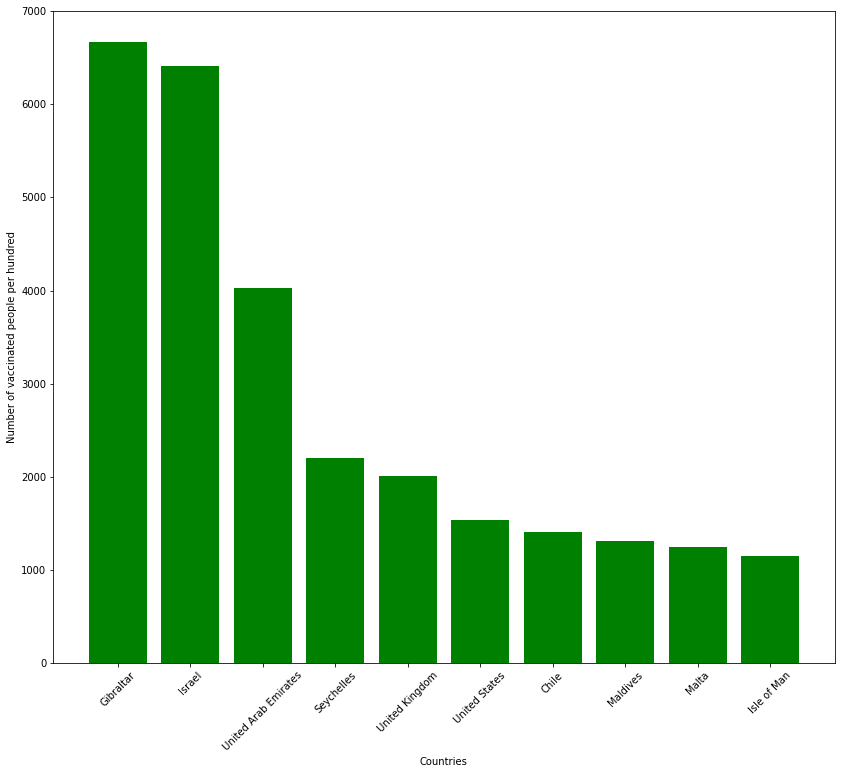

In [0]:
vaccine_economy_pd_df = vaccine_economy_df_curated.toPandas()
vacc_amount = vaccine_economy_pd_df.groupby('country_name').max().sort_values('total_vaccinations_per_hundred', ascending=False)
plt.figure(figsize=(14, 12))
vacc_amount = vacc_amount.iloc[:10]
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred, color = 'g')

plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation = 45)
plt.show()

In [0]:
%sql
select country_name, GDPCAP from vaccine_economy_temp order by GDPCAP;

country_name,GDPCAP
Jersey,0.0
Faeroe Islands,0.0
Guernsey,0.0
Gibraltar,0.0
Montserrat,0.0
Taiwan,0.0
Isle of Man,0.0
Andorra,0.0
Falkland Islands,0.0
Turks and Caicos Islands,0.0


#### Key takeaway 4.1 from above two graphs
- The rate of vaccination is high in Gibraltor followed by Israel,United Arab emirates and seychelles.
- Malawi has the lowest GDP per capita 6.99 while Qatar has the highest GDP per capita 11.66.We could see from the above two graphs that few countries with high vaccination rate are also the countries with high GDP,exploring this relationship further with the below analysis

#### Exploring the relationship between covid vaccination trend and economic parameters using correlation

Out[175]:

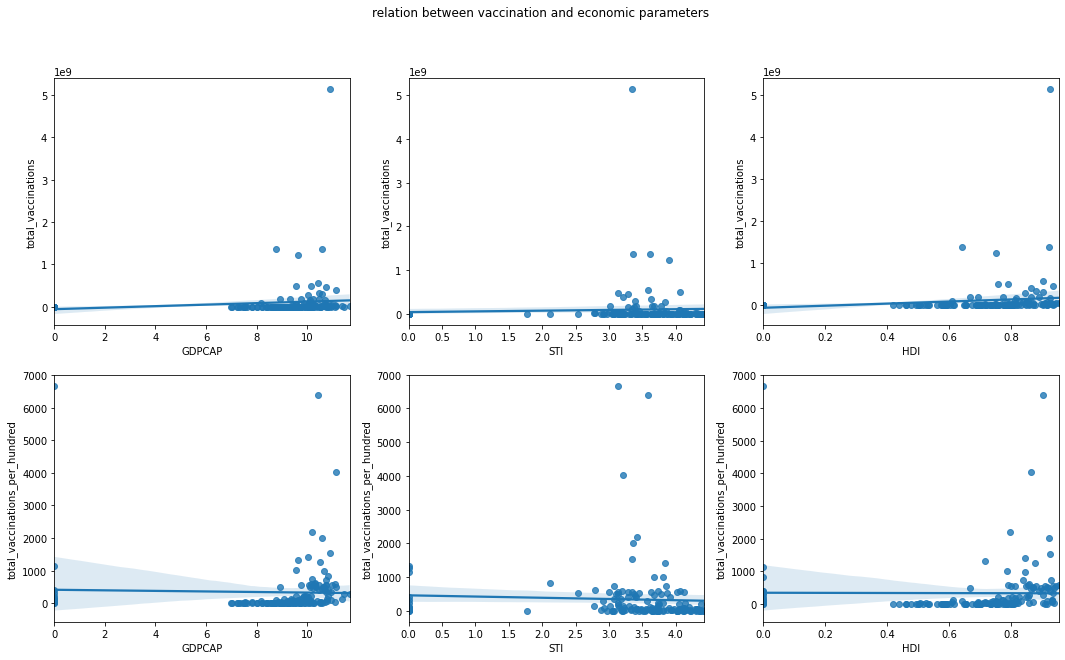

<matplotlib.axes._subplots.AxesSubplot at 0x7f931218f9d0>

In [0]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('relation between vaccination and economic parameters')

sns.regplot(ax=axes[0, 0], data=vaccine_economy_pd_df, y='total_vaccinations', x='GDPCAP')
sns.regplot(ax=axes[0, 1], data=vaccine_economy_pd_df, y='total_vaccinations', x='STI')
sns.regplot(ax=axes[0, 2], data=vaccine_economy_pd_df, y='total_vaccinations', x='HDI')
sns.regplot(ax=axes[1, 0], data=vaccine_economy_pd_df, y='total_vaccinations_per_hundred', x='GDPCAP')
sns.regplot(ax=axes[1, 1], data=vaccine_economy_pd_df, y='total_vaccinations_per_hundred', x='STI')
sns.regplot(ax=axes[1, 2], data=vaccine_economy_pd_df, y='total_vaccinations_per_hundred', x='HDI')

#### Key takeaway 4.2 from above graphs
 - Higher rate of vaccination and higher GDPCAP are closely assosciated,Countries with high GDP have a faster vaccination rate

### Insight 05
- Top categories of covid vaccines used accross countries

In [0]:
#vaccines used
vaccines_top=vaccines_df_raw.groupBy("vaccines").agg(sum("total_vaccinations").alias("topvaccinations"))
vaccines_top10= vaccines_top.sort(desc("topvaccinations")).limit(10)
vaccines_top10_pd=vaccines_top10.toPandas()

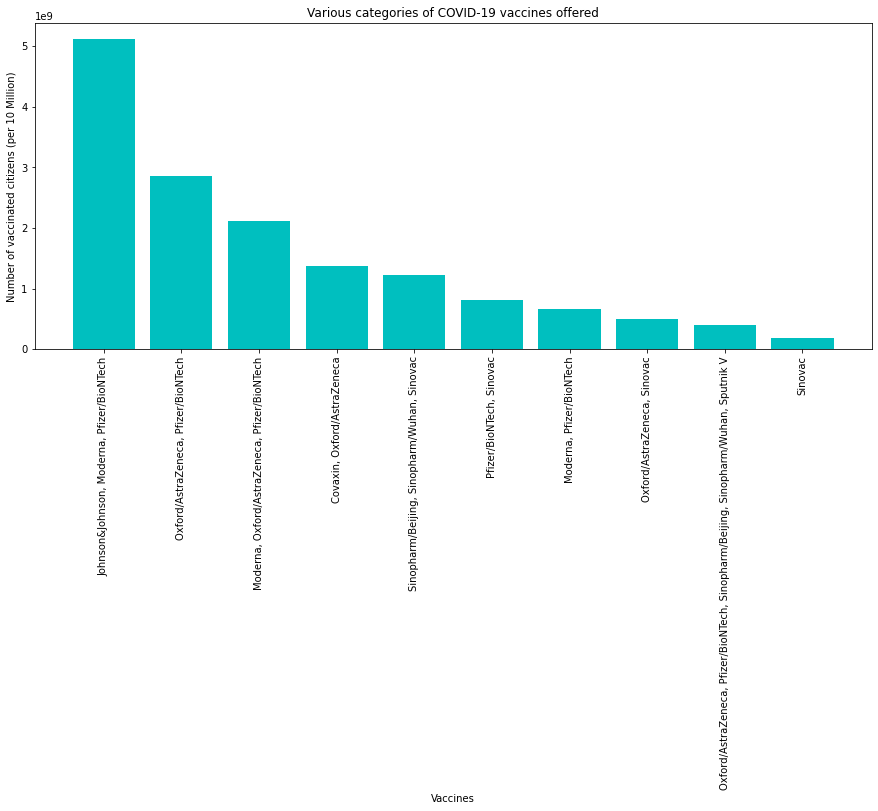

In [0]:
plt.figure(figsize=(15,6))
vacc_top = vaccines_top10_pd.groupby('vaccines').max().sort_values('topvaccinations', ascending=False)
plt.bar(vacc_top.index, vacc_top.topvaccinations, color ='c')

plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show();

#### Key takeaway 5
- Johnson and Johnson,Moderna,Pfizer/BioNtech are the most used vaccines worlwide

#### Grouping the data using Advanced Grouping Functions and generating insights

In [0]:
vaccine_economy_df_curated.display()

country_name,total_vaccinations,total_people_vaccinated,total_people_fully_vaccinated,total_daily_vaccinations,total_vaccinations_per_hundred,total_people_vaccinated_per_hundred,total_people_fully_vaccinated_per_hundred,HDI,TC,TD,STI,POP,GDPCAP
Anguilla,18380.0,18380.0,0.0,1421.0,122.52000331878662,122.52000331878662,0.0,0.0,1.084900927428462,0.0,3.3038508212508786,9.615939140319824,0.0
Paraguay,374390.0,356020.0,0.0,41027.0,5.249999962747097,4.990000002086163,0.0,0.7020000219345093,7.36213545599698,3.4483521410022013,4.107295319897488,15.780176162719727,9.0855712890625
Russia,1.60672921E8,1.15226604E8,4.5446317E7,3063247.0,110.10000067576766,78.96999936923385,31.15999984741211,0.8159999847412109,9.362518360825623,5.925392204401445,3.3800881711804136,18.798667907714844,10.11722469329834
Senegal,3665236.0,3665236.0,0.0,182393.0,21.86999985203147,21.86999985203147,0.0,0.5049999952316284,7.598615383594594,3.657241104004231,3.335328401403224,16.633546829223633,7.81220817565918
Sweden,1.4190317E7,1.0062056E7,4128261.0,96178.0,140.499999884516,99.60999954119325,40.879999466240406,0.9330000281333923,8.073878214531337,5.945179114227033,2.780008789599966,16.127973556518555,10.756823539733887
Guyana,18044.0,18044.0,0.0,0.0,2.290000021457672,2.290000021457672,0.0,0.6539999842643738,5.502963674667219,2.7176951164524303,4.214602161215865,13.575423240661621,8.913960456848145
Jersey,419533.0,359548.0,59985.0,0.0,415.06999588012695,355.74999237060547,59.3299994468689,0.0,5.61710499491647,3.015519459670949,0.0,11.523598670959473,0.0
Philippines,1491841.0,1491841.0,0.0,14734.0,1.3600000124424696,1.3600000124424696,0.0,0.6990000009536743,7.943670485295406,5.214902799956652,3.67810236191263,18.512174606323242,8.935796737670898
Malaysia,9312247.0,8517572.0,0.0,596165.0,28.740000093355775,26.29000004567206,0.0,0.8019999861717224,7.111804568848642,3.3696295817693076,3.6216474520105892,17.292619705200195,10.19646167755127
Singapore,7724296.0,5514793.0,2209503.0,55206.0,132.02999929711223,94.26000122353435,37.76000006496906,0.9319999814033508,8.125493895034401,2.13773826028214,3.730736896294315,15.582011222839355,11.356685638427734


In [0]:
worldecon_df_raw.show()

+----+-----------+----------+-----+---+---+---+---------+---------+
CODE| COUNTRY| DATE| HDI| TC| TD|STI| POP| GDPCAP|
+----+-----------+----------+-----+---+---+---+---------+---------+
 AFG|Afghanistan|2019-12-31|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-01|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-02|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-03|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-04|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-05|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-06|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-07|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-08|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-09|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-10|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-11|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-12|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-13|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-14|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-15|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-16|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-17|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-18|0.498|0.0|0.0|0.0|17.477234|7.4977546|
 AFG|Afghanistan|2020-01-19|0.498|0.0|0.0|0.0|17.477234|7.4977546|
+----+-----------+----------+-----+---+---+---+---------+---------+
only showing top 20 rows

### Insight 06
- Revenue (Total Cost), GDP, POP generated from vaccinations grouped by Country, date and code and finding the Rank

##### Cube has been used to generate subtotals for all combinations of the fields; CODE,COUNTRY AND DATE

In [0]:
%python
vaccinecubedf = worldecon_df_raw.cube("CODE","COUNTRY","DATE").sum("TC")

In [0]:
vaccinecubedf.cache()
vaccinecubedf.display()

CODE,COUNTRY,DATE,sum(TC)
AGO,Angola,2020-07-12,6.18001651763916
AGO,Angola,2020-08-20,7.583756446838379
AGO,Angola,2020-09-11,8.03657341003418
ATG,Antigua and Barbuda,2020-10-09,4.709530353546143
ARG,Argentina,2020-07-07,11.261922836303711
ARG,Argentina,2020-08-21,12.652827262878418
ARG,Argentina,2020-09-28,13.47486686706543
ARM,Armenia,2020-01-22,0.0
ARM,Armenia,2020-01-26,0.0
ARM,Armenia,2020-09-20,10.761174201965332


In [0]:
%python
vaccineCubeSortedDF = vaccinecubedf.sort(col("CODE").desc_nulls_first(),
                     col("COUNTRY").desc_nulls_first(), 
                     col("DATE").desc_nulls_first())
vaccineCubeSortedDF.cache().display()

CODE,COUNTRY,DATE,sum(TC)
null,null,null,340932.8085386753
null,null,2020-10-19,1873.838133096695
null,null,2020-10-18,1885.630676984787
null,null,2020-10-17,1895.5634768009186
null,null,2020-10-16,1904.174971818924
null,null,2020-10-15,1900.7301836013794
null,null,2020-10-14,1898.194519996643
null,null,2020-10-13,1896.2140126228333
null,null,2020-10-12,1893.3140614032745
null,null,2020-10-11,1891.669293642044


##### The sorted cube dataframe above is filtered by Country, Code, Date and the Revenue for each country based on the cube operation applied above is displayed.

In [0]:
%python
display((vaccineCubeSortedDF
 .filter(col("COUNTRY").isNotNull())
 .filter(col("CODE").isNull())  
 .filter(col("DATE").isNull()) 
 .select(col("COUNTRY"), format_number(col("sum(TC)"), 2).alias("Revenue"))
 .orderBy("Revenue")))

COUNTRY,Revenue
Hong Kong,0.00
Sint Maarten (Dutch part),"1,009.04"
Bermuda,"1,014.65"
Cayman Islands,"1,024.04"
Gambia,"1,034.61"
French Polynesia,"1,043.96"
Mongolia,"1,049.80"
Brunei,"1,084.62"
Botswana,"1,097.53"
Gibraltar,"1,111.10"


#### Key takeaway 6
- From the above plot, we can see that China, Polynesia, Mexico and the Bahamas have comparatively a higher revenue from vaccinations when grouped according to date, code and country.

#### Insight 07
- Implemented the concept of windowing function to find the total cost based on POP and country

In [0]:
%python
stocksPOP = (vaccine_economy_df_curated
                      .groupBy(col("POP"), col("country_name"))
                      .sum("TC")
                      .withColumnRenamed("sum(TC)", "TotalCost"))

In [0]:
stocksPOP.display()

POP,country_name,TotalCost
9.615939140319824,Anguilla,1.084900927428462
15.780176162719727,Paraguay,7.36213545599698
18.798667907714844,Russia,9.362518360825623
16.633546829223633,Senegal,7.598615383594594
16.127973556518555,Sweden,8.073878214531337
13.575423240661621,Guyana,5.502963674667219
11.523598670959473,Jersey,5.61710499491647
18.512174606323242,Philippines,7.943670485295406
17.292619705200195,Malaysia,7.111804568848642
15.582011222839355,Singapore,8.125493895034401


In [0]:
from pyspark.sql import Window
from pyspark.sql.functions import row_number

POPwindow = Window.partitionBy("country_name").orderBy(col("TotalCost").desc())

POPStocksByCountry = (stocksPOP
                       .withColumn("rank", row_number().over(POPwindow))
                       .where(col("rank") < 5)).select("country_name", "POP", "TotalCost", "Rank")

In [0]:
%python
POPStocksByCountry.display()

country_name,POP,TotalCost,Rank
Anguilla,9.615939140319824,1.084900927428462,1
Paraguay,15.780176162719727,7.36213545599698,1
Russia,18.798667907714844,9.362518360825623,1
Senegal,16.633546829223633,7.598615383594594,1
Sweden,16.127973556518555,8.073878214531337,1
Guyana,13.575423240661621,5.502963674667219,1
Jersey,11.523598670959473,5.61710499491647,1
Philippines,18.512174606323242,7.943670485295406,1
Malaysia,17.292619705200195,7.111804568848642,1
Singapore,15.582011222839355,8.125493895034401,1


#### Key takeaway 7
- From the above two tables, we can infer that the Total Cost and Public Offering Price of vaccinations is ranked highest for Anguilla and the least for France.

## CONCLUSION
#### From the above analysis and visualizations we can conclude that:
- 1)The United states has the most vaccinated people followed by India,United Kingdom and China
- 2)The rate of vaccination is high in Gibraltor followed by Israel,United Arab emirates and seychelles.
- 3) Johnson and Johnson,Moderna,Pfizer/BioNtech are the most used vaccines worlwide 
- 4) Higher rate of vaccination and  higher GDPCAP are closely assosciated,Countries with high GDP have a faster vaccination rate
- 5) We can find a steady pattern where as GDPCAP increases the STI also increases 
- 6) We can infer that the Total Cost and Public Offering Price of vaccinations is ranked highest for Anguilla and the least for France.
- 7) We can see that China, Polynesia, Mexico and the Bahamas have comparatively a higher revenue from vaccinations when grouped according to date, code and country.

## Learnings and Key Take-aways
<ul>
  <li>Learnt the different zones in the Data Lake architecture and implemented it</li>
  <li>Learnt the importance of Advanced Grouping functions viz; Cube, Roll-up, Window, and implemented them in this assignment to reduce overhead in the queries</li>
  <li>Learnt the importance of storing data in columnar formats</li>
</ul>